In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy
from astropy import units as u

# Research question: what stars have HZ bounds most likely for earth-like planets to exist? 

%matplotlib inline
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath} \def\AU{\text{AU}}'


def calc_habitable_zone(m_v, d, spectral_class):
    # absolute visual magnitude
    M_v = m_v - 5 * np.log10(d / 10)  # m_v is apparent magnitude d is distance from earth to the star in parsecs

    BC_dict = {'B': -2.0, 'A': -0.3, 'F': -0.15, 'G': -0.4, 'K': -0.8, 'M': -2.0}
    BC = BC_dict.get(spectral_class)

    # calc bolometric magnitude of host star
    M_bol = M_v + BC  # BC is bolometric correction constant

    # calc absolute luminosity of host star
    M_bolsun = 4.72
    L_star = 10 ** ((M_bol - M_bolsun) / -2.5)

    inner_edge = np.sqrt(L_star / 1.1)
    outer_edge = np.sqrt(L_star / 0.53)
    return inner_edge, outer_edge
    # (Morris 2023)

    # inner_edge = 0.99 # for an earth-like planet (Kopparapu et al 2013)
    # outer_edge = 1.70 # for an earth-like planet (Kopparapu et al 2013) 
    # return inner_edge, outer_edge


def plot_habitable_zone():
    inner_edge, outer_edge = calc_habitable_zone(m_v, d, spectral_class)

    # distances = np.linspace(0, outer_edge * 2, 500)
    theta = np.linspace(0, 2 * np.pi, 500)

    # plt.figure(figsize=(8, 6))
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(6, 6))

    ax.fill_between(theta, inner_edge, outer_edge, color='g', alpha=0.5,
                    label=rf"Habitable Zone \newline Inner Radius: {round(inner_edge, 2)} ($\AU$) \newline Outer Radius: {round(outer_edge, 3)} ($\AU$)")
    ax.set_aspect('equal')

    ax.scatter(0, 0, color='yellow', s=300,
               label=rf'Star Mass: {stellar_mass} ($M_\odot$) \newline Star Type: {spectral_class}')
    ax.scatter(0, planet_distance, color='blue', s=100,
               label=rf'Planet Mass: {planet_mass} ($M_\odot$) \newline Distance: {planet_distance} ($\AU$)')
    ax.set_title('Habitable Zone (Polar View)', va='bottom')
    ax.set_rlim(0, outer_edge * 1.5)
    ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
    plt.show()

    # plt.axvspan(inner_edge, outer_edge, alpha=0.5, color='g', label='Habitable Zone')
    # plt.scatter(0, 0, color='yellow', s=300, label=rf'Star Mass: {stellar_mass} ($M_\odot$) \newline Star Type: {stellar_type}')
    # planet_distance = np.random.uniform(inner_edge, outer_edge) # for initial simulation test
    # planet_distance = P**2 * mass_star # calculating if using period input
    # plt.scatter(planet_distance, 0, color='blue', s=100, label=rf'Planet Mass: {planet_mass} ($M_\odot$) \newline Distance: {planet_distance} ($\AU$)')

    # ""plt.xlim(0, outer_edge * 2)
    # plt.ylim(-0.5, 0.5)
    # plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    # plt.title("Habitable Zone")
    # plt.xlabel(r"Distance from Star ($\AU$)")
    # plt.ylabel("Relative Position")
    # plt.legend()
    # plt.grid()
    # plt.show()""

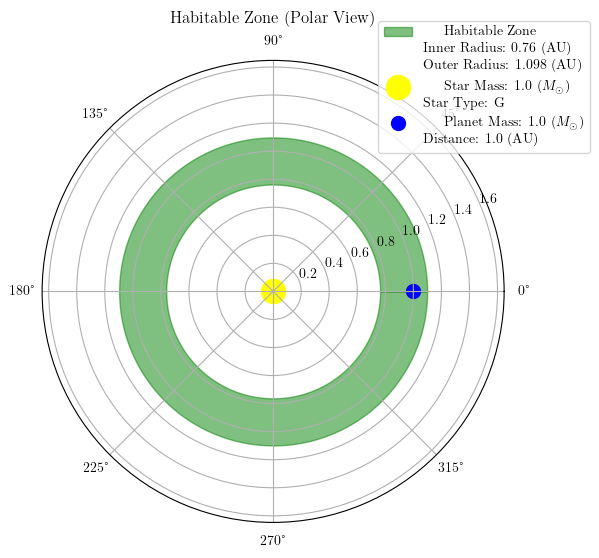

In [3]:
spectral_class = 'G'
m_v = 12
d = 190

# not being used:
stellar_mass = 1.0
luminosity = 10.0
planet_mass = 1.0
planet_distance = 1.0

calc_habitable_zone(m_v, d, spectral_class)
plot_habitable_zone()
